## **Plant pathology classification**

The project concerns the recognition of apple leaf diseases based on their photos. The leaves are classified as "healthy", "multiple diseases", "scab" and "rust". This is a multiclass classification problem. In this approach we used a transfer learning with pre-trained MobileNet V2 model to recognition of leaves diseases. In our problem we will check what accuracy we are able to achieve by using transfer learning method. 

**Transfer learning** is a machine learning technique where a model trained on one task is re-purposed on a second related task.  An important application of transfer learning is when the dataset is small then one can use a pre-trained model on similar images and can easily achieve high performance.

MobileNet V2 is a classification model developed by Google. 
This model is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. The model architecture utilizes an inverted residual structure where the input and output of the residual blocks are thin bottleneck layers. It also uses lightweight convolutions to filter features in the expansion layer. Finally it removes non-linearities in the narrow layers.

**Data**

The data comes from kaggle competition (Plant Pathology 2020 - FGVC7).

### **Import libraries and data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

Read data:

In [ ]:
cd '/content/drive/My Drive/moje pliki/AS_zad'

/content/drive/My Drive/moje pliki/AS_zad


In [ ]:
images_path = '/content/drive/My Drive/moje pliki/AS_zad/images'
train = pd.read_csv('/content/drive/My Drive/moje pliki/AS_zad/train.csv')
test = pd.read_csv('/content/drive/My Drive/moje pliki/AS_zad/train.csv')

### **Data analysis**

The dataset contains csv. files divided into training and test ones and a folder of photos in jpg format.

The data include photos of the apple leaves describing their diseases. There are 4 classes: healthy, rust, scub and multiple diseases.

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
#shape of data
print(train.shape)
print(test.shape)

(1821, 5)
(1821, 5)


Number of photos in each class: 

In [ ]:
number_of_images = ['healthy', 'multiple_diseases', 'rust', 'scab']

print(train[number_of_images].sum())

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64


Distribution of individual classes on the charts: 

Text(0, 0.5, 'Counts')

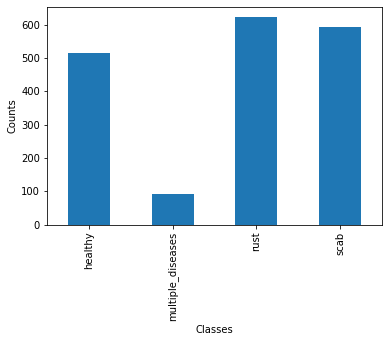

In [ ]:
train[number_of_images].sum().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Counts')

After first observations we can see that we have 1,821 images with 4 classes in the training data and the same amount of test data. We can also see that the data is out of balance. The fewest images are in the category of multiple diseases. 

### **Data preparation**

We divide the data into training and test sets and change the image size to 224.

In [ ]:
IMG_SIZE = 224

train_images = []

for name in train['image_id']:
  path = os.path.join(images_path, name) + ".jpg"
  image = cv2.imread(path)
  img = cv2.resize(image,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  train_images.append(img)


In [ ]:
test_images = []

for name in test['image_id']:
  path = os.path.join(images_path, name) + ".jpg"
  image = cv2.imread(path)
  img = cv2.resize(image,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
  test_images.append(img)

In [ ]:
len(train_images), len(test_images)

(1821, 1821)

Visualization of images: 

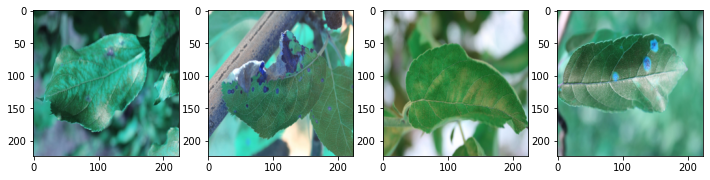

In [ ]:
#train set
f, ax = plt.subplots(1, 4, figsize=(12,12))
for i in range(4):
  ax[i].imshow(train_images[i])

Then we need to write the data into array and rescale all the images. The RGB channel values need to be standardized, which are in the range of [0, 255], so that they are in the range of [0, 1].

Train set:


In [ ]:
X_train = np.ndarray(shape=(len(train_images), IMG_SIZE, IMG_SIZE, 3), dtype = np.float32)

for i, img in enumerate(train_images):
  X_train[i] = img_to_array(img)
  X_train[i] = train_images[i]

X_train = X_train/255

print(X_train.shape)

(1821, 224, 224, 3)


In [ ]:
y_train = train.drop(columns=['image_id'])
y_train = np.array(y_train.values)

In [ ]:
y_train.shape

(1821, 4)

The same transformation for test set: 

In [ ]:
X_test = np.ndarray(shape=(len(test_images), IMG_SIZE, IMG_SIZE, 3), dtype = np.float32)

for i, img in enumerate(test_images):
  X_test[i] = img_to_array(img)
  X_test[i] = test_images[i]

X_test = X_test/255

print(X_test.shape)

(1821, 224, 224, 3)


In [ ]:
y_test = test.drop(columns=['image_id'])
y_test = np.array(y_test.values)

**Division of data into test and validation data**

We divide the data into a testing and validation sets by use train_test_split method in sklearn library. We split them into 50% of testing and validation data.


In [ ]:
print(X_train.shape)

(1821, 224, 224, 3)


In [ ]:
print(X_test.shape)

(1821, 224, 224, 3)


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test ,y_test, test_size=0.5, random_state=42)

X_test.shape, X_val.shape

((910, 224, 224, 3), (911, 224, 224, 3))

Final shapes of our data:

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1821, 224, 224, 3)
(910, 224, 224, 3)
(911, 224, 224, 3)


Since the dataset is not balanced we have to create a balanced dataset for each class. The results give the same number of samples in multiple classes.

To get a balanced dataset we will use the SMOTE library:


In [ ]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train.reshape((-1, img_size*img_size*3)), y_train)

X_train = X_train.reshape((-1, img_size, img_size, 3))

In [ ]:
X_train.shape, y_train.shape

((2488, 224, 224, 3), (2488, 4))

### **Creating the model**

We build model by using transfer learning with pre-trained MobileNet V2 model. 

First we create the base MobileNetV2 model:

In [ ]:
IMG_SHAPE = (224,224,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In this point we are instantiating a model where the classification layers will depend on the last layer before the flatten operation. 

Next we freeze the convolutional layers to use the base model as a feature extractor:

In [ ]:
base_model.trainable = False

**Model 1**
 
The model 1 consists of Global Average Pooling 2D layer, then we added two Dense layers with one Dropout layer as well. 


In [ ]:
model = tf.keras.Sequential([base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(4, activation="softmax")                                     
                             ])

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

We train the model for 10 epoch:

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
78/78 [==============================] - 14s 133ms/step - loss: 1.0469 - accuracy: 0.5535 - val_loss: 0.7883 - val_accuracy: 0.7088
Epoch 2/10
78/78 [==============================] - 9s 119ms/step - loss: 0.7378 - accuracy: 0.7074 - val_loss: 0.6854 - val_accuracy: 0.7473
Epoch 3/10
78/78 [==============================] - 9s 116ms/step - loss: 0.6134 - accuracy: 0.7645 - val_loss: 0.6152 - val_accuracy: 0.7681
Epoch 4/10
78/78 [==============================] - 9s 116ms/step - loss: 0.5570 - accuracy: 0.7886 - val_loss: 0.4695 - val_accuracy: 0.8231
Epoch 5/10
78/78 [==============================] - 9s 116ms/step - loss: 0.4893 - accuracy: 0.8207 - val_loss: 0.4349 - val_accuracy: 0.8462
Epoch 6/10
78/78 [==============================] - 9s 116ms/step - loss: 0.4543 - accuracy: 0.8368 - val_loss: 0.4218 - val_accuracy: 0.8637
Epoch 7/10
78/78 [==============================] - 9s 116ms/step - loss: 0.4170 - accuracy: 0.8493 - val_loss: 0.3571 - val_accuracy: 0.8791
Epoch

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

The plots of loss and accuracy on the training and validation sets:

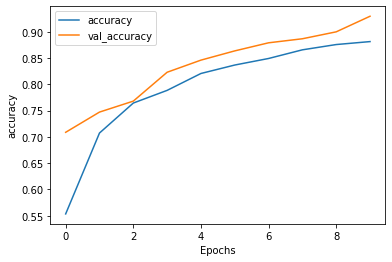

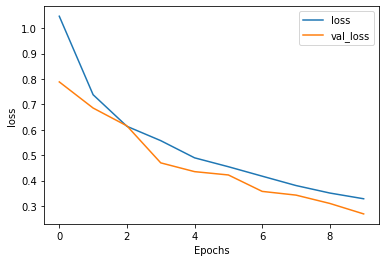

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Prediction for model 1:

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9421
Testing Accuracy:  0.9265


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing loss:  {:.4f}".format(loss))

Testing loss:  0.2598


It looks like the model performed quite well. The training and validation accuracy is increasing together and the same is in the training and validation loss. On the test data we achieved 93% accuracy. However we will check if we can improve its accuracy in next model.

**Model 2**

In model two we change a bit architecture of our model to check if we achieve a better results. 

In [ ]:
model2 = tf.keras.Sequential([base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(4, activation="softmax")                                     
                             ])

In [ ]:
model2.compile(optimizer = 'adam', 
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

We train the model for 10 epoch:

In [ ]:
history2 = model2.fit(X_train, y_train,
                      batch_size = 32,
                      epochs = 10,
                      validation_data=(X_val, y_val),
                      verbose=1)

Epoch 1/10
78/78 [==============================] - 93s 1s/step - loss: 0.9394 - accuracy: 0.6246 - val_loss: 0.6376 - val_accuracy: 0.7703
Epoch 2/10
78/78 [==============================] - 89s 1s/step - loss: 0.6218 - accuracy: 0.7741 - val_loss: 0.5649 - val_accuracy: 0.7923
Epoch 3/10
78/78 [==============================] - 90s 1s/step - loss: 0.5049 - accuracy: 0.8111 - val_loss: 0.4349 - val_accuracy: 0.8484
Epoch 4/10
78/78 [==============================] - 90s 1s/step - loss: 0.4196 - accuracy: 0.8497 - val_loss: 0.4011 - val_accuracy: 0.8582
Epoch 5/10
78/78 [==============================] - 90s 1s/step - loss: 0.3679 - accuracy: 0.8674 - val_loss: 0.3076 - val_accuracy: 0.9022
Epoch 6/10
78/78 [==============================] - 90s 1s/step - loss: 0.3167 - accuracy: 0.8850 - val_loss: 0.2720 - val_accuracy: 0.9220
Epoch 7/10
78/78 [==============================] - 90s 1s/step - loss: 0.2801 - accuracy: 0.9059 - val_loss: 0.2597 - val_accuracy: 0.9121
Epoch 8/10
78/78 [==

The plots of loss and accuracy on the training and validation sets:

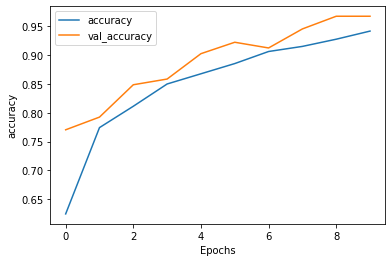

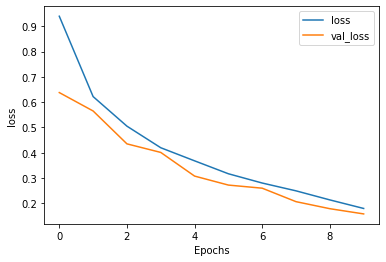

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [ ]:
loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9703
Testing Accuracy:  0.9561


In [ ]:
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing loss:  {:.4f}".format(loss))

Testing loss:  0.1765


In [ ]:
#save the model
model2.save("plant_model_tf.h5")

In this model we achived a better result than in first one. The training graphs show that the model was able to converge. The accuracy of the test set was at the level of 96% and was also better compared to the model 1.

### **Summary**

For our analysis we have used a pretrained MobileNetV2 model to resolve our image classification problem. From above analysis we can see that the second model is better than first one. By virtue the transfer learning and by a little bit of architecture changes  it was possible to obtain a model with better accuracy.
